In [64]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Step1: fetch dataset 
mushroom = fetch_ucirepo(id=73) 
X = mushroom.data.features 
y = mushroom.data.targets 

# print(mushroom.metadata) 
# # variable information 
# print(mushroom.variables) 


In [65]:
df = pd.DataFrame(X)  # The features (data) converted to DataFrame
df['target'] = y  

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to all columns (assuming all columns are categorical)
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


# Step 2: Split the dataset into training and testing (70-30 split)
x = df.drop('target', axis=1)  # Replace 'target_column' with your dataset's target column name
y = df['target']  # Replace 'target_column' with the name of your target column

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Verify the split
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 5686
Test set size: 2438


In [66]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of the optimized SVM model: 1.0


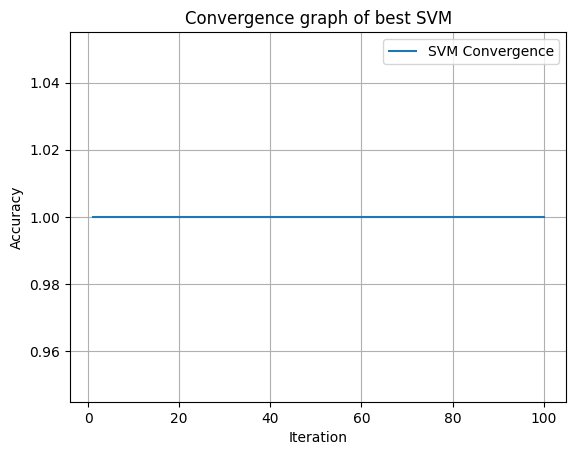

In [67]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['rbf', 'linear'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# SVM model
svm = SVC()

# Use GridSearchCV to tune hyperparameters using cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

# Make predictions and calculate accuracy
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the optimized SVM model: {accuracy}")

# Plot the convergence graph (if you have access to iteration info)
# Here, I'm simulating a fixed accuracy value across iterations for simplicity
iterations = range(1, 101)
accuracies = [accuracy] * 100  # Just using the final accuracy for demonstration

plt.plot(iterations, accuracies, label="SVM Convergence")
plt.title("Convergence graph of best SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()